# Hidden Mickey classification CNN

In [8]:
import historyPlot

import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Input, Conv2D, MaxPooling2D
from keras import applications
from keras.callbacks import ModelCheckpoint
from keras import optimizers
from keras import regularizers
import tensorflow as tf
import matplotlib.pyplot as plt

In [9]:
def plotImage(image, result):
    plt.imshow(image)
    plt.title(result)    
    plt.show()   

In [10]:
# Device to load the neural network on.
# Useful if you're training a model on the same
# machine, in which case use CPU and leave the
# GPU for training.

DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0\n",

In [11]:
# input image dimension
input_image_dim  = 256

batch_size = 32
epochs = 100

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (input_image_dim, input_image_dim),
                                                 batch_size = batch_size,
                                                 class_mode = 'binary',
                                                 shuffle=False)


validation_set = validation_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (input_image_dim, input_image_dim),
                                            batch_size = batch_size,
                                            class_mode = 'binary',
                                            shuffle=False)

training_set.class_indices

Found 348 images belonging to 2 classes.
Found 182 images belonging to 2 classes.


{'mickey': 0, 'non-mickey': 1}

In [16]:
with tf.device(DEVICE):
    model = Sequential()
    model.add(Conv2D(64, (5, 5), kernel_regularizer=regularizers.l2(0.001), activation='relu', 
                     input_shape=(input_image_dim, input_image_dim, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(256, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(512, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(Dense(1, kernel_regularizer=regularizers.l2(0.001), activation='sigmoid'))
    print(model.summary())


    model.compile(optimizer=optimizers.RMSprop(lr=0.000025),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 252, 252, 64)      4864      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 126, 126, 64)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 124, 124, 128)     73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 62, 62, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 60, 60, 256)       295168    
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 30, 30, 256)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 256)       590080    
__________

In [17]:
with tf.device(DEVICE):
    
    # checkpoint
    callbacksList = None
    filepath="hm.weights.best.cnn-1.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, 
                                 save_weights_only=True, mode='max')
    callbacksList = [checkpoint]
    
    history = model.fit_generator(training_set, steps_per_epoch = 100, 
                        epochs = epochs, 
                        validation_data = validation_set, 
                        validation_steps = 50,
                        callbacks=callbacksList)

Epoch 1/100
100/100 [==============================] - 113s 1s/step - loss: 2.1791 - acc: 0.5682 - val_loss: 2.1115 - val_acc: 0.5316

Epoch 00001: val_acc improved from -inf to 0.53158, saving model to hm.weights.best.cnn-1.hdf5
Epoch 2/100
100/100 [==============================] - 116s 1s/step - loss: 1.9911 - acc: 0.5782 - val_loss: 1.9366 - val_acc: 0.5368

Epoch 00002: val_acc improved from 0.53158 to 0.53684, saving model to hm.weights.best.cnn-1.hdf5
Epoch 3/100
100/100 [==============================] - 117s 1s/step - loss: 1.8363 - acc: 0.6498 - val_loss: 1.8191 - val_acc: 0.6250

Epoch 00003: val_acc improved from 0.53684 to 0.62500, saving model to hm.weights.best.cnn-1.hdf5
Epoch 4/100
100/100 [==============================] - 117s 1s/step - loss: 1.7042 - acc: 0.7233 - val_loss: 1.7318 - val_acc: 0.6816

Epoch 00004: val_acc improved from 0.62500 to 0.68158, saving model to hm.weights.best.cnn-1.hdf5
Epoch 5/100
100/100 [==============================] - 110s 1s/step - l


Epoch 00042: val_acc did not improve from 0.81711
Epoch 43/100
100/100 [==============================] - 134s 1s/step - loss: 0.5998 - acc: 0.9975 - val_loss: 1.5149 - val_acc: 0.7980

Epoch 00043: val_acc did not improve from 0.81711
Epoch 44/100
100/100 [==============================] - 132s 1s/step - loss: 0.5941 - acc: 0.9947 - val_loss: 1.6105 - val_acc: 0.7664

Epoch 00044: val_acc did not improve from 0.81711
Epoch 45/100
100/100 [==============================] - 123s 1s/step - loss: 0.5747 - acc: 0.9991 - val_loss: 1.4958 - val_acc: 0.7980

Epoch 00045: val_acc did not improve from 0.81711
Epoch 46/100
100/100 [==============================] - 130s 1s/step - loss: 0.5658 - acc: 0.9969 - val_loss: 1.4782 - val_acc: 0.7974

Epoch 00046: val_acc did not improve from 0.81711
Epoch 47/100
100/100 [==============================] - 132s 1s/step - loss: 0.5627 - acc: 0.9934 - val_loss: 1.5442 - val_acc: 0.7664

Epoch 00047: val_acc did not improve from 0.81711
Epoch 48/100
100/10

100/100 [==============================] - 123s 1s/step - loss: 0.3085 - acc: 0.9969 - val_loss: 1.2889 - val_acc: 0.7908

Epoch 00087: val_acc did not improve from 0.81711
Epoch 88/100
100/100 [==============================] - 124s 1s/step - loss: 0.2957 - acc: 0.9997 - val_loss: 1.3257 - val_acc: 0.7737

Epoch 00088: val_acc did not improve from 0.81711
Epoch 89/100
100/100 [==============================] - 120s 1s/step - loss: 0.2974 - acc: 0.9959 - val_loss: 1.5678 - val_acc: 0.7651

Epoch 00089: val_acc did not improve from 0.81711
Epoch 90/100
100/100 [==============================] - 120s 1s/step - loss: 0.2954 - acc: 0.9969 - val_loss: 1.3852 - val_acc: 0.7664

Epoch 00090: val_acc did not improve from 0.81711
Epoch 91/100
100/100 [==============================] - 122s 1s/step - loss: 0.2955 - acc: 0.9953 - val_loss: 1.3633 - val_acc: 0.7730

Epoch 00091: val_acc did not improve from 0.81711
Epoch 92/100
100/100 [==============================] - 123s 1s/step - loss: 0.2869

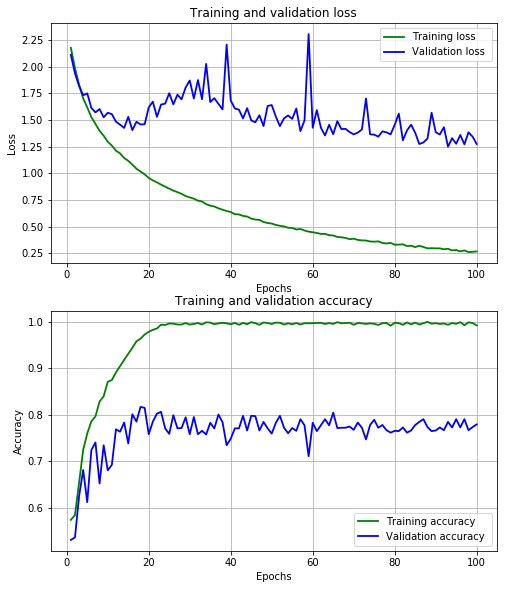

In [18]:
historyPlot.plotHistoryArray([history])

In [20]:
model.load_weights("hm.weights.best.cnn-1.hdf5")

In [21]:
results = model.evaluate_generator(validation_set)
print("Model test results: ", results)

Model test results:  [1.4681567346656716, 0.8131868105668288]


dataset/prediction/01-royal-rooms-hidden-mickey-11.jpg [[0.]] mickey


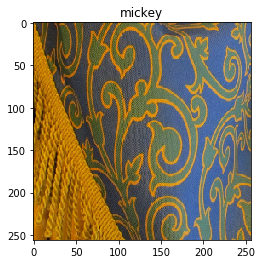

dataset/prediction/10734_big.jpg [[0.]] mickey


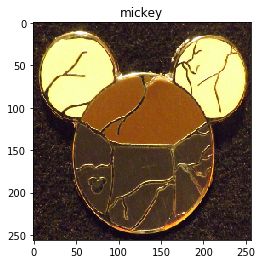

dataset/prediction/20180210_130801-M.jpg [[0.]] mickey


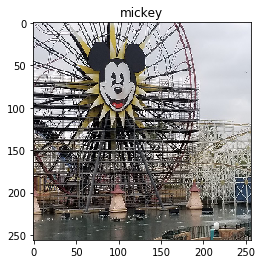

dataset/prediction/3389555126_4d7b74ff0a_b.jpg [[0.]] mickey


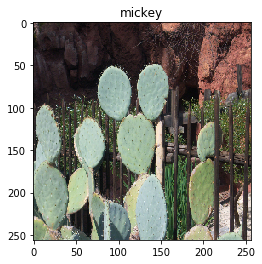

dataset/prediction/5306bc8f63e1762c5ccce18722462da6--mickey-disney-mickey-mouse.jpg [[1.]] non-mickey


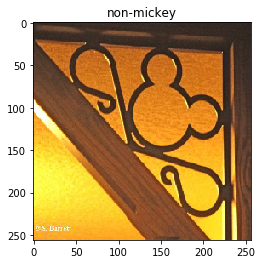

dataset/prediction/avenger.jpg [[0.]] mickey


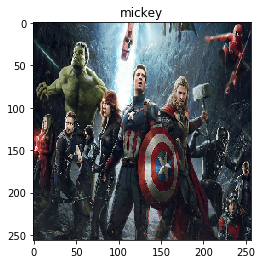

dataset/prediction/california_disneyland_article.jpg [[0.]] mickey


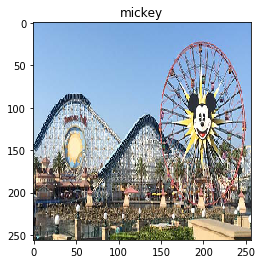

dataset/prediction/cattles.jpg [[1.]] non-mickey


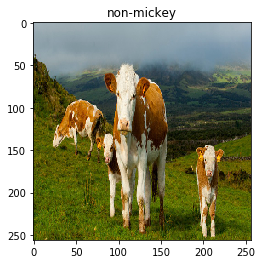

dataset/prediction/cow.jpg [[1.]] non-mickey


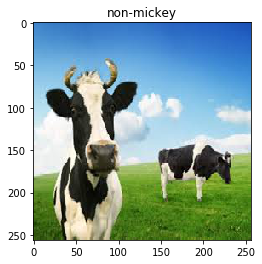

dataset/prediction/DFgg3zh_Xo_AIr_Xp4.jpg [[0.]] mickey


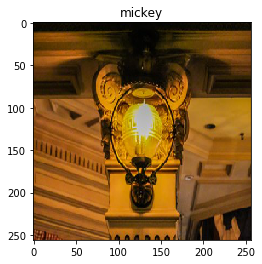

dataset/prediction/dl2_orig.jpg [[0.]] mickey


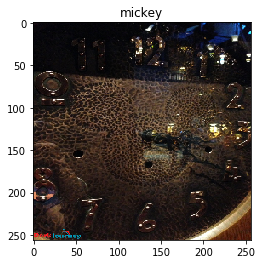

dataset/prediction/edc74fdf1b37fbdd92281215a777622a.jpg [[0.]] mickey


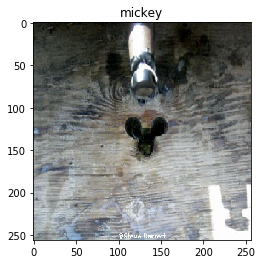

dataset/prediction/EPCOTSecrets_hiddenmickey_glover.jpg [[1.]] non-mickey


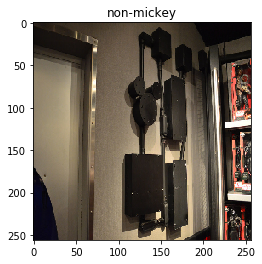

dataset/prediction/fish.jpg [[0.]] mickey


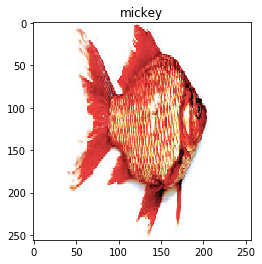

dataset/prediction/fish2.jpg [[1.]] non-mickey


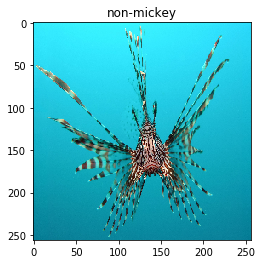

dataset/prediction/fish3.jpg [[0.]] mickey


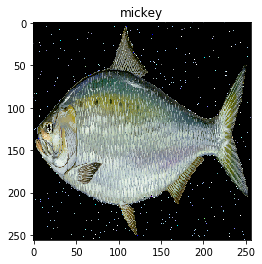

dataset/prediction/Haunted-Mansion.jpg [[1.]] non-mickey


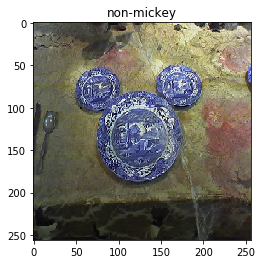

dataset/prediction/Hidden-Mickey-Canada-Pavilion-Epcot.jpg [[0.]] mickey


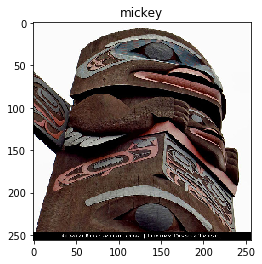

dataset/prediction/HiddenMickeyEPCOTCanada.jpg [[0.]] mickey


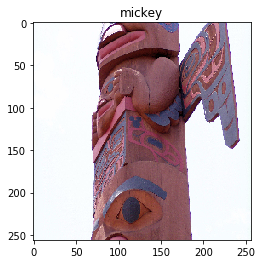

dataset/prediction/HiddenMickeys.jpg [[0.]] mickey


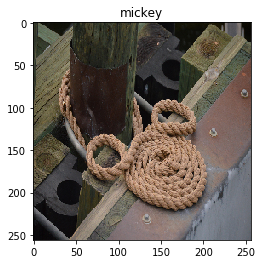

dataset/prediction/hm-1-images.jpg [[0.]] mickey


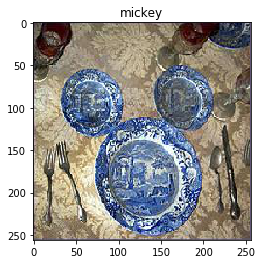

dataset/prediction/hm-2-images.jpg [[1.]] non-mickey


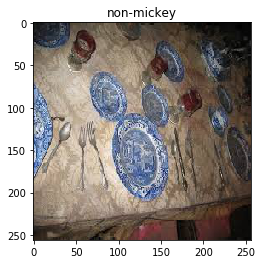

dataset/prediction/hm-3-images.jpg [[0.]] mickey


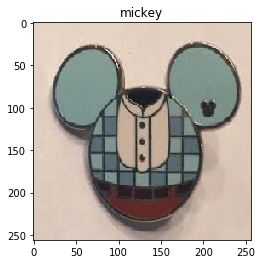

dataset/prediction/ht_totem_pole_101027_ssh.jpg [[0.]] mickey


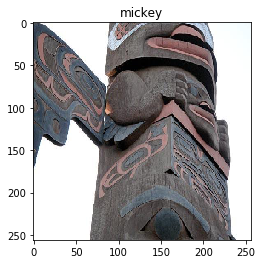

dataset/prediction/img_1271.jpg [[0.]] mickey


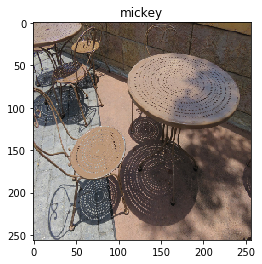

dataset/prediction/incredibles.jpg [[0.]] mickey


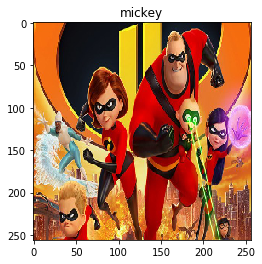

dataset/prediction/ladiesandtramp.jpg [[0.]] mickey


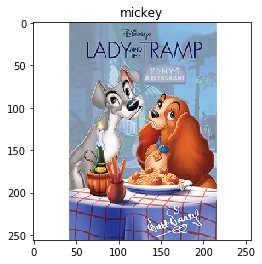

dataset/prediction/mickey1.jpg [[0.]] mickey


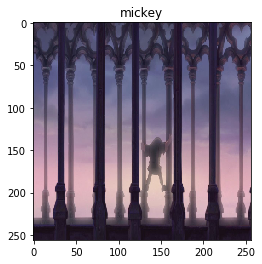

dataset/prediction/mickey2.jpg [[0.]] mickey


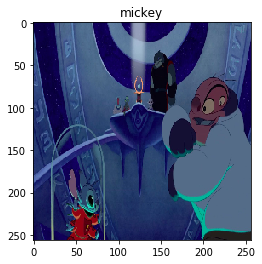

dataset/prediction/mickey3.jpg [[0.]] mickey


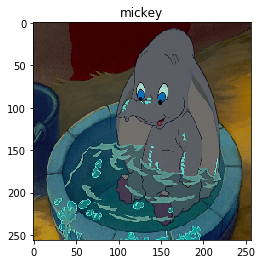

dataset/prediction/mickey4.jpg [[0.]] mickey


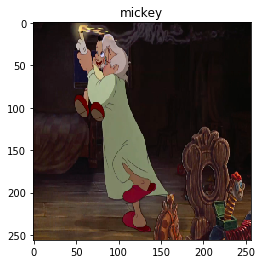

dataset/prediction/mickey5.jpg [[0.]] mickey


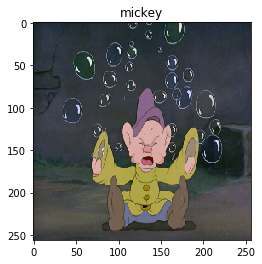

dataset/prediction/mickey6.jpg [[0.]] mickey


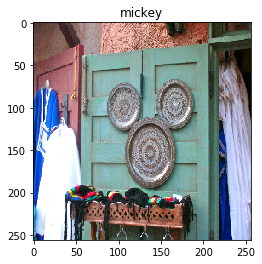

dataset/prediction/mickey7.jpg [[0.]] mickey


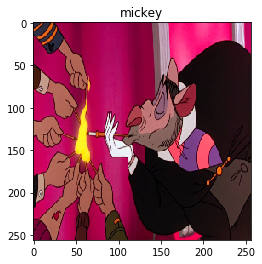

dataset/prediction/mickey8.jpg [[0.]] mickey


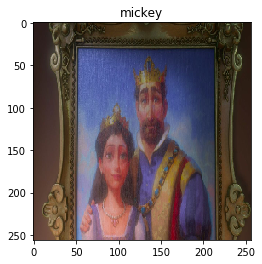

dataset/prediction/mickey9.jpg [[1.]] non-mickey


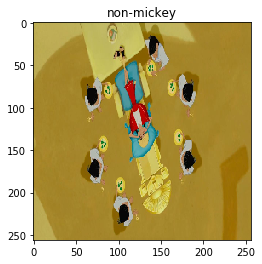

dataset/prediction/mickeyinfield.jpg [[0.]] mickey


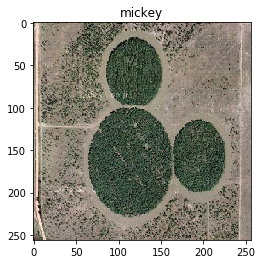

dataset/prediction/pixar-pier-rides-guide-disney-california-adventure.jpg [[1.]] non-mickey


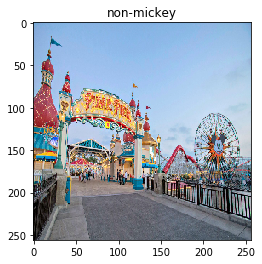

dataset/prediction/Rope-Hidden-Mickey.jpg [[0.]] mickey


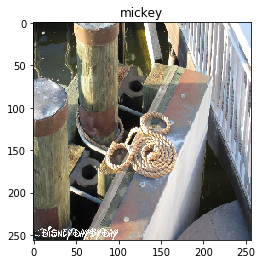

In [22]:
import numpy as np
import os
from keras.preprocessing import image


prediction_path = 'dataset/prediction/'

folder = os.fsencode(prediction_path)

for file in os.listdir(folder):
  filename = os.fsdecode(file)
  if filename.endswith( ('.jpg', '.png', '.gif') ): # whatever file types you're using...    
    prediction_image_filename = prediction_path + filename 
    prediction_image = image.load_img(prediction_image_filename, target_size = (input_image_dim, input_image_dim))
    prediction_image = image.img_to_array(prediction_image)
    #prediction_image = prediction_image / 255
    prediction_image = np.expand_dims(prediction_image, axis = 0)
    result = np.round(model.predict(prediction_image))
    # 0 = mickey , 1 = non-mickey
    #print (result)
    if result[0][0] == 0:
      prediction_result = 'mickey'
    else:
      prediction_result = 'non-mickey'
 
    print (prediction_image_filename , result, prediction_result)
    plotImage(prediction_image[0]/255, prediction_result)


